<a href="https://colab.research.google.com/github/peddlem25/Classify-soybean/blob/master/Soybean_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Dependencies
import os
import cv2
import pickle
import random
import numpy as np

In [2]:
#Import Kaggle API Key
from google.colab import files
files.upload()

Saving kaggle-2.json to kaggle-2.json


{'kaggle-2.json': b'{"username":"peddlem","key":"c9ed0f50455e4f2997d347d410d55325"}'}

In [0]:
#Install Kaggle API
!pip install -q kaggle

In [0]:
!mkdir -p ~/.kaggle-2
!cp kaggle-2.json ~/.kaggle-2/

In [7]:
!kaggle datasets list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 6, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [8]:
os.environ['KAGGLE_USERNAME'] = "peddlem" 
os.environ['KAGGLE_KEY'] = "c9ed0f50455e4f2997d347d410d55325" 
!kaggle datasets download -d fpeccia/weed-detection-in-soybean-crops

100% 2.36G/2.37G [00:24<00:00, 106MB/s]
100% 2.37G/2.37G [00:24<00:00, 102MB/s]


In [0]:
#UnZip file
from zipfile import ZipFile

zf = ZipFile('weed-detection-in-soybean-crops.zip', 'r')
zf.extractall()
zf.close()

In [0]:
!rm -r /content/dataset/dataset

In [0]:
file_path = "/content/dataset"
categories = ['broadleaf','grass','soil','soybean']
img_size = 64

In [0]:
def get_data(file_path, categories, img_size):
    data = []
    for category in categories:
        c = categories.index(category)
        img_path = os.path.join(file_path, category)
        for img in os.listdir(img_path):
            try:
                a = cv2.imread(os.path.join(img_path, img))
                a = cv2.resize(a, (img_size, img_size))
                data.append([a, c])
            except Exception as e:
                pass
    return data

In [0]:
data_set = get_data(file_path, categories, img_size)

In [0]:
random.shuffle(data_set)

In [0]:
x=[]
y=[]

In [0]:
def spit_x_y(x, y, d):
    for i in d:
        x.append(i[0])
        y.append(i[1])

In [0]:
spit_x_y(x, y, data_set)

###Data Processing

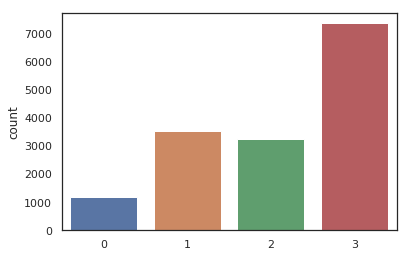

In [18]:
import seaborn as sns
sns.set(style="white")
ax = sns.countplot(y)

In [0]:
#Broadleaf and undersampling on soybean sample


In [0]:
x_0=[]
x_1=[]
x_2=[]
x_3=[]

y_0=[]
y_1=[]
y_2=[]
y_3=[]


for i in range(len(y)):
  if y[i]==0:
      x_0.append(x[i])
      y_0.append(y[i])
  
  elif y[i]==1:
      x_1.append(x[i])
      y_1.append(y[i])

  elif y[i]==2:
      x_2.append(x[i])
      y_2.append(y[i])

  elif y[i]==3:
      x_3.append(x[i])
      y_3.append(y[i])

  else:
    print('Error has occured')

del x, y

In [0]:
for i in range(len(y_2)-len(y_0)):
  a = random.randrange(len(y_0))
  y_0.append(y_0[a])
  x_0.append(x_0[a])

In [0]:
y_3=y_3[:len(y_1)]
x_3=x_3[:len(x_1)]

In [0]:
x = x_0 + x_1 + x_2 + x_3
y = y_0 + y_1 + y_2 + y_3

In [0]:
d = []
for i in range(len(x)):
  d.append([x[i],y[i]])

del x_0, x_1, x_2, x_3, x, y_0, y_1, y_2, y_3, y

In [0]:
random.shuffle(d)

In [0]:
x=[]
y=[]
spit_x_y(x, y, d)
del d, a, ax, data_set

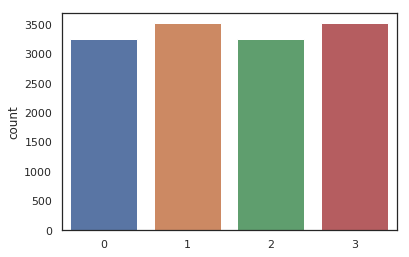

In [26]:
ax = sns.countplot(y)

Disply Data at Random

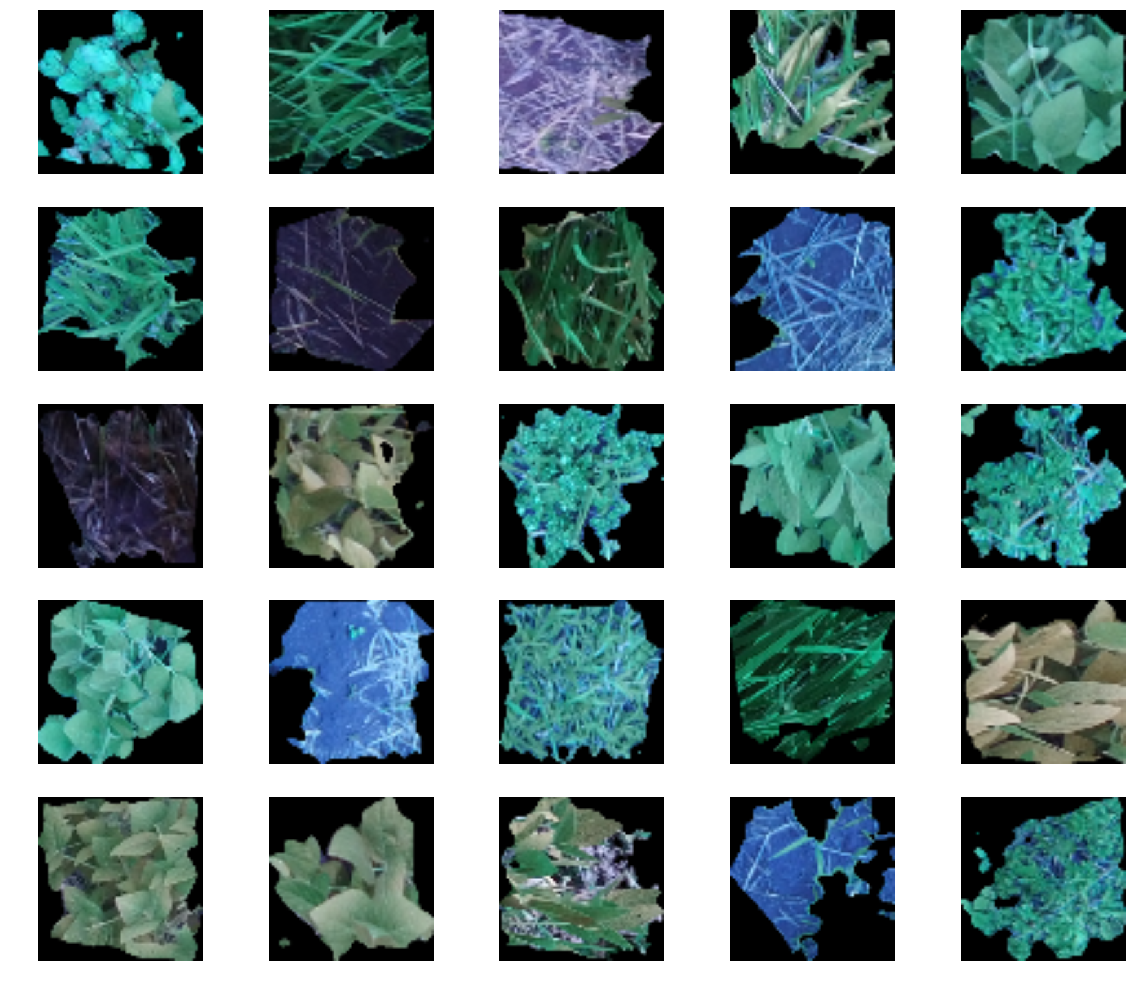

In [27]:
import matplotlib.pyplot as plt
import random
import cv2

f,ax = plt.subplots(5, 5, figsize=(5*4, 5*3.5))

for idx in range(0, 25):
  i = random.randint(0, len(x))
  a = x[i]
  a = cv2.resize(a, (255, 255))
  ax[idx//5,idx%5].imshow(a)
  ax[idx//5,idx%5].axis('off')
plt.show()

In [0]:
##Splitting the data into train, test and validation data

In [0]:
def nump_con(x):
    x = np.array(x)
    x = x.reshape(-1, img_size, img_size, 3)
    return x

In [0]:
x_train = x[:len(x)//2]
x_test = x[len(x)//2:(2)*(len(x)//3)]
x_val = x[(2)*(len(x)//3):]

y_train = y[:len(y)//2]
y_test = y[len(y)//2:(2)*(len(y)//3)]
y_val = y[(2)*(len(y)//3):]

In [0]:
del x, y

In [0]:
x_train = nump_con(x_train)
x_test = nump_con(x_test)
x_val = nump_con(x_val)

In [0]:
x_train = x_train/255
x_test = x_test/255
x_val = x_val/255

In [0]:
y_train = np.array(y_train)
y_test = np.array(y_test)
y_val = np.array(y_val)

In [0]:
del ZipFile, ax, categories, cv2, file_path, get_data, i, img_size, np, nump_con, os, random, sns, spit_x_y, zf

#Saving the Data

In [0]:
pkl = open('x_train', 'wb')
pickle.dump(x_train, pkl)
pkl.close()
del x_train

pkl = open('y_train', 'wb')
pickle.dump(y_train, pkl)
pkl.close()
del y_train


pkl = open('x_test', 'wb')
pickle.dump(x_test, pkl)
pkl.close()
del x_test

pkl = open('y_test', 'wb')
pickle.dump(y_test, pkl)
pkl.close()
del y_test


pkl = open('x_val', 'wb')
pickle.dump(x_val, pkl)
pkl.close()
del x_val

pkl = open('y_val', 'wb')
pickle.dump(y_val, pkl)
pkl.close()
del y_val

In [0]:
del pickle, pkl

##ML Time

In [0]:
#Load the data
import pickle

with open('x_train', 'rb+') as f:
    x_train = pickle.load(f)

with open('y_train', 'rb+') as f:
    y_train = pickle.load(f)

with open('x_test', 'rb+') as f:
    x_test = pickle.load(f)

with open('y_test', 'rb+') as f:
    y_test = pickle.load(f)
    
with open('x_val', 'rb+') as f:
    x_val = pickle.load(f)

with open('y_val', 'rb+') as f:
    y_val = pickle.load(f)  

del pickle, f

In [0]:
#Making Neural Net Layers

In [0]:
import numpy as np

In [0]:
def flatten_layer(X):
		flatX = np.zeros((X.shape[0],np.prod(X.shape[1:])))
		for i in range(X.shape[0]):
			flatX[i,:] = X[i].flatten(order='C')
		return flatX

In [0]:
def wghts_gen(input_size, output_size):
  return (7e-4 * np.random.randn(input_size, output_size))

In [0]:
def bias_gen(size):
  return np.zeros(size)

In [0]:
def relu(x):
  return np.maximum(x, 0)

In [0]:
def Loss(x, wghts,  wghts1, bias, bias1, y=None, reg=0.0):

  layer1 = relu(x.dot(wghts) + bias)  
  scores = layer1.dot(wghts1) + bias1

  if(y is None): 
    return scores

  scores -= scores.max()

  scores = np.exp(scores)
  scores_sumexp = np.sum(scores, axis=1)

  softmax = scores / scores_sumexp.reshape(x.shape[0],1)

  loss =  (-1.0) * np.sum(np.log(softmax[range(x.shape[0]),y]))

  loss /= x.shape[0]
  loss += reg * np.sum(wghts * wghts) 
  loss += reg * np.sum(wghts1 * wghts1) 

  grads = {}

  correct_class_scores = scores[range(x.shape[0]), y]
  softmax[range(x.shape[0]), y] = (-1.0) * (scores_sumexp - correct_class_scores)/scores_sumexp
  softmax /= x.shape[0]

  grads['wghts1'] = layer1.T.dot(softmax)
  grads['bias1'] = np.sum(softmax, axis=0)
  grads['wghts1'] += reg * 2 * wghts1

  hidden = softmax.dot(wghts1.T)

  hidden[layer1 == 0] = 0 

  grads['wghts'] = x.T.dot(hidden)
  grads['bias'] = np.sum(hidden, axis=0)
  grads['wghts'] += reg * 2 * wghts

  return loss, grads

##Training Neural Network

In [0]:
def train(x, y, x_val, y_val, W1, W2, b1, b2, learning_rate =1e-3, learning_rate_decay=0.95, reg=5e-6, num_iters=100, batch_size=200, it_verbose = 1, verbose=False):
  x=flatten_layer(x)
  N, D = x.shape
  N_val = x_val.shape[0]
  iteration_per_epoch = max(N/batch_size, 1)
  
  loss_hist = []
  train_acc_hist = []
  val_acc_hist = []

  for it in range(num_iters):
      sampling = np.random.choice(np.arange(N), batch_size, replace=False) 
      x_batch = x[sampling]
      y_batch = y[sampling]
      
      loss, grads = Loss(x_batch,W1,W2,b1,b2, y=y_batch, reg=reg)
      loss_hist.append(loss) 
      
      W1 += (-1.0) * learning_rate * grads['wghts']
      b1 += (-1.0) * learning_rate * grads['bias']
      W2 += (-1.0) * learning_rate * grads['wghts1']
      b2 += (-1.0) * learning_rate * grads['bias1']
      if(verbose and it%it_verbose==0):
          print('iteration: %d / %d | Loss: %f' % (it, num_iters, loss)) 

      if (it % iteration_per_epoch == 0):
          train_acc = (predict(x_batch, W1, W2, b1, b2) == y_batch).mean()
          val_acc = (predict(x_val, W1, W2, b1, b2) == y_val).mean()
          train_acc_hist.append(train_acc)
          val_acc_hist.append(val_acc)

          learning_rate *= learning_rate_decay

  return {
      'loss_hist':loss_hist,
      'train_acc_hist':train_acc_hist,
      'val_acc_hist':val_acc_hist,
      'W1':W1,
      'b1':b1,
      'W2':W2,
      'b2':b2
  }
  

In [0]:
def predict(X,W1=None,W2=None,b1=None,b2=None, params=None):
  y_pred = None
  if params!=None:
    W1, b1 = params['W1'], params['b1']
    W2, b2 = params['W2'], params['b2']

  layer1 = relu(X.dot(W1) + b1)
  scores = layer1.dot(W2) + b2 
  y_pred = np.argmax(scores, axis=1)

  return y_pred

In [0]:
x_train=flatten_layer(x_train)
x_test=flatten_layer(x_test)
x_val=flatten_layer(x_val)
wghts = wghts_gen(x_train.shape[1], 250)
bias = bias_gen(250)
wghts1 = wghts_gen(250, 4)
bias1 = bias_gen(4)

In [65]:
stats=train(x_train, y_train, x_test, y_test, wghts, wghts1, bias, bias1, num_iters=3000, verbose=True,learning_rate =7.6e-3, reg=0,batch_size=1000)

iteration: 0 / 3000 | Loss: 1.386287
iteration: 1 / 3000 | Loss: 1.386277
iteration: 2 / 3000 | Loss: 1.386266
iteration: 3 / 3000 | Loss: 1.386257
iteration: 4 / 3000 | Loss: 1.386243
iteration: 5 / 3000 | Loss: 1.386223
iteration: 6 / 3000 | Loss: 1.386225
iteration: 7 / 3000 | Loss: 1.386204
iteration: 8 / 3000 | Loss: 1.386225
iteration: 9 / 3000 | Loss: 1.386197
iteration: 10 / 3000 | Loss: 1.386187
iteration: 11 / 3000 | Loss: 1.386196
iteration: 12 / 3000 | Loss: 1.386164
iteration: 13 / 3000 | Loss: 1.386152
iteration: 14 / 3000 | Loss: 1.386140
iteration: 15 / 3000 | Loss: 1.386086
iteration: 16 / 3000 | Loss: 1.386087
iteration: 17 / 3000 | Loss: 1.386096
iteration: 18 / 3000 | Loss: 1.386133
iteration: 19 / 3000 | Loss: 1.386128
iteration: 20 / 3000 | Loss: 1.386161
iteration: 21 / 3000 | Loss: 1.386119
iteration: 22 / 3000 | Loss: 1.386066
iteration: 23 / 3000 | Loss: 1.386013
iteration: 24 / 3000 | Loss: 1.386012
iteration: 25 / 3000 | Loss: 1.386083
iteration: 26 / 3000 |

##Predicting

grass
soybean


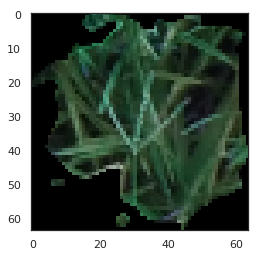

In [66]:
import matplotlib.pyplot as plt
categories=['broadleaf','grass','soil','soybean']
print(categories[y_val[1]])
print(categories[predict(x_val,params=stats)[1]])
plt.imshow(x_val[1].reshape(64,64,3))

soil
soil


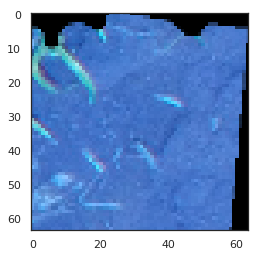

In [67]:
print(categories[y_val[5]])
print(categories[predict(x_val,params=stats)[5]])
plt.imshow(x_val[5].reshape(64,64,3))

soil
soil


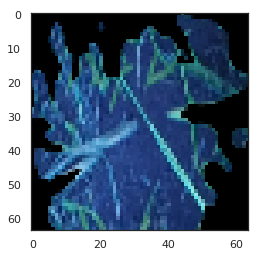

In [71]:
print(categories[y_val[22]])
print(categories[predict(x_val,params=stats)[22]])
plt.imshow(x_val[22].reshape(64,64,3))

soybean
soybean


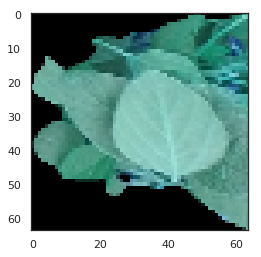

In [72]:
print(categories[y_val[60]])
print(categories[predict(x_val,params=stats)[60]])
plt.imshow(x_val[60].reshape(64,64,3))

soybean
soybean


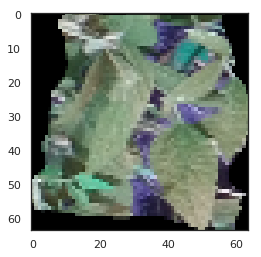

In [73]:
print(categories[y_val[25]])
print(categories[predict(x_val,params=stats)[25]])
plt.imshow(x_val[25].reshape(64,64,3))

grass
soybean


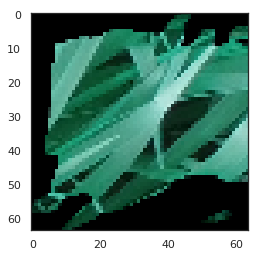

In [74]:
print(categories[y_val[77]])
print(categories[predict(x_val,params=stats)[77]])
plt.imshow(x_val[77].reshape(64,64,3))